<a href="https://colab.research.google.com/github/Braither/Course_ComputationalTools/blob/main/HC_Tarea3_NumericalDerivatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

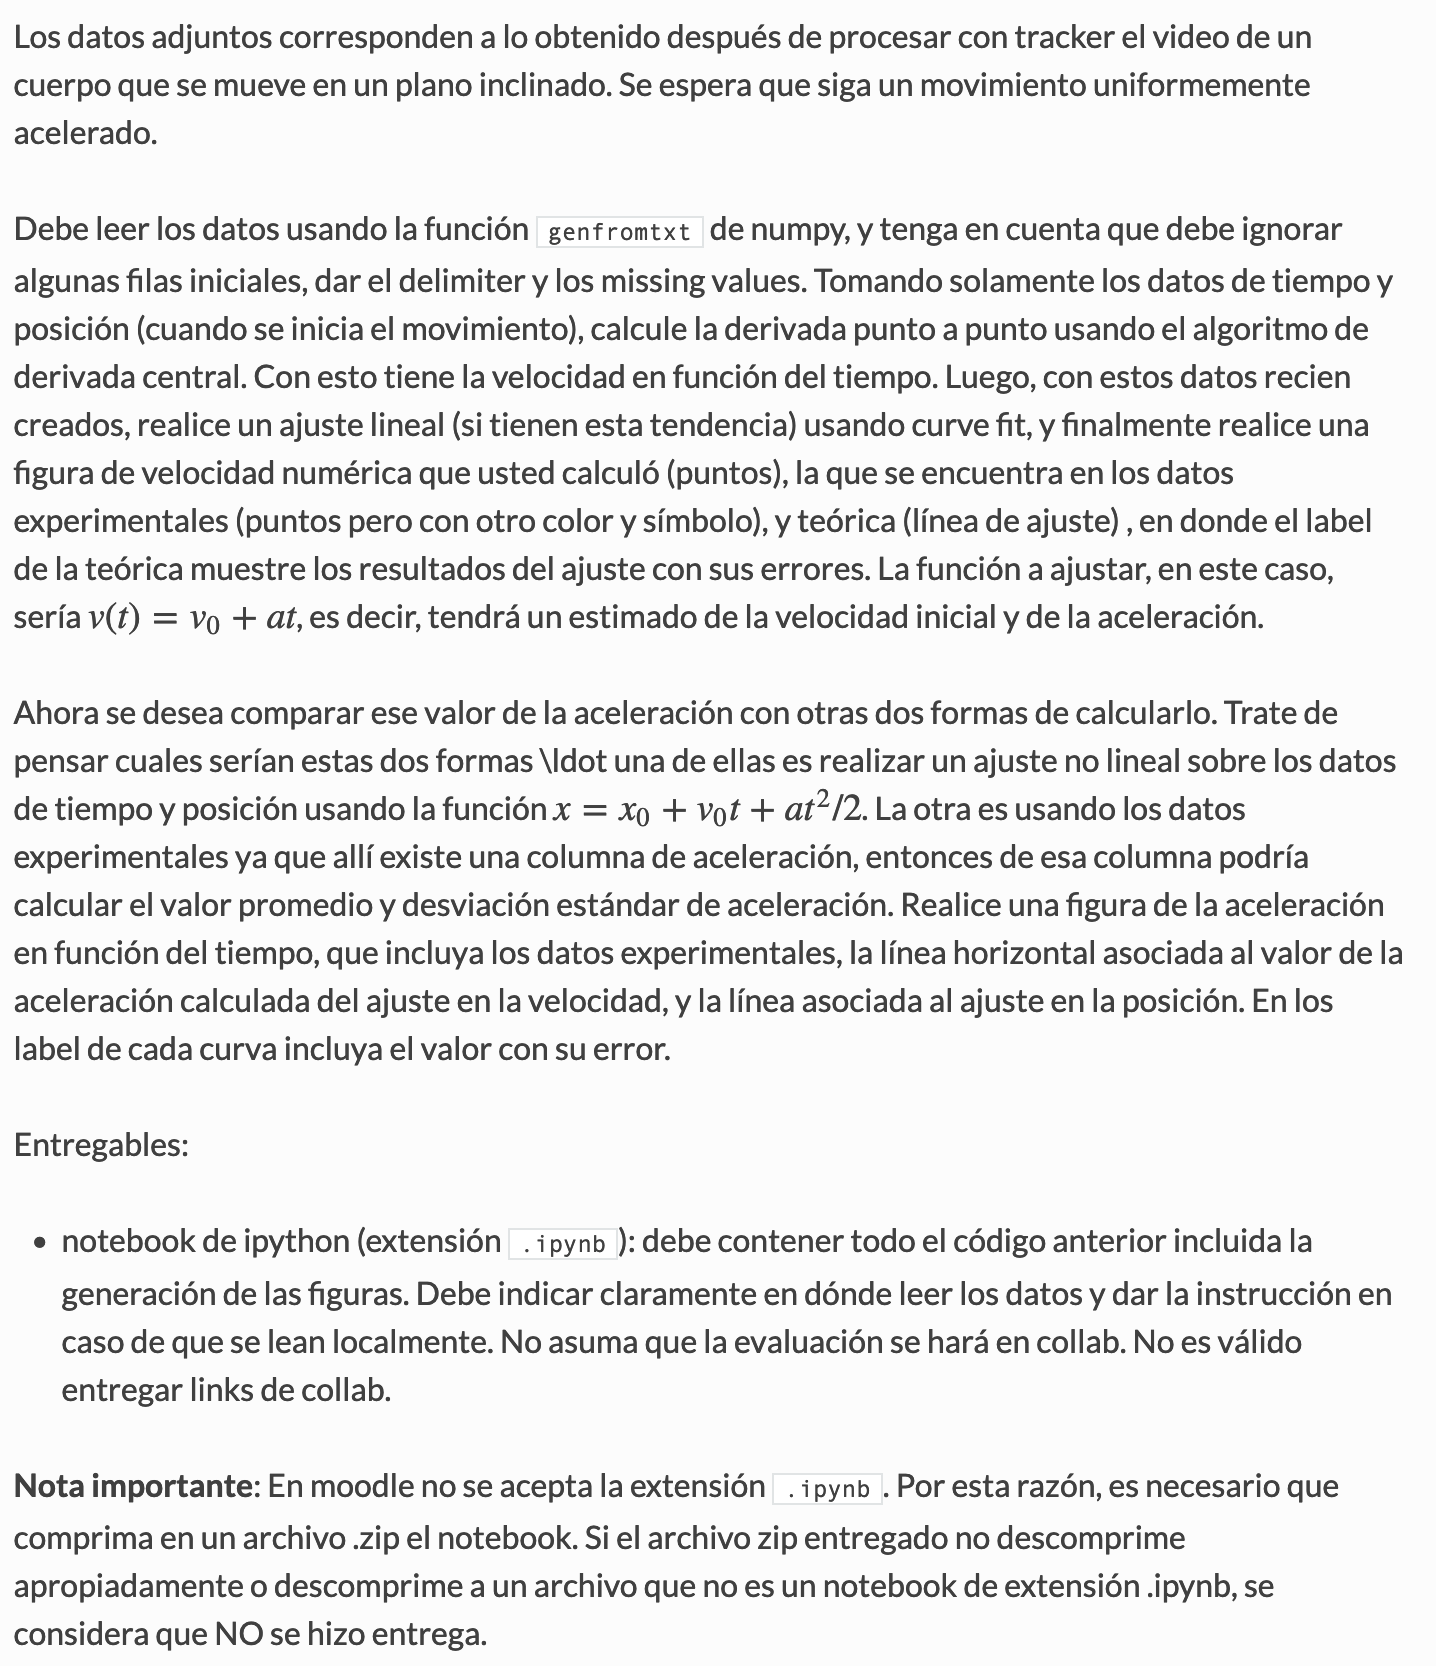

<ipython-input-238-b8e7adc92907>:42: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


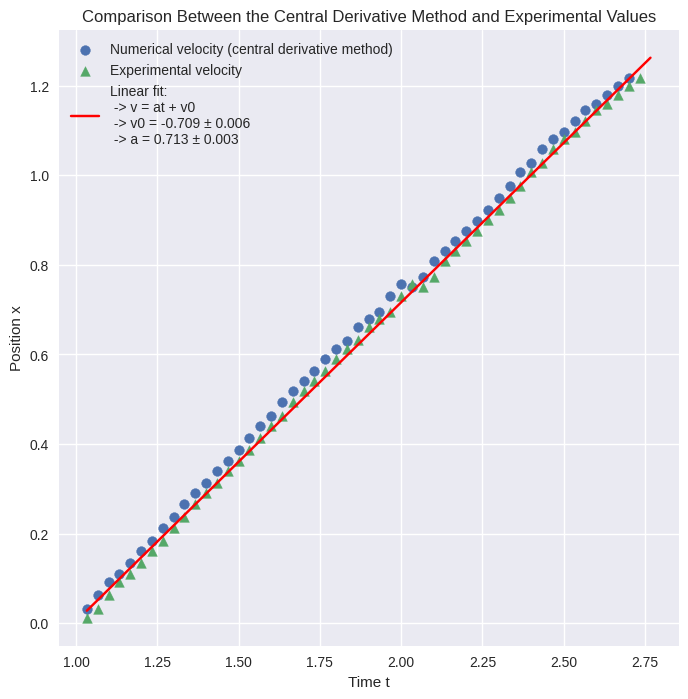

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit


#Definimos una función que calcula la derivada central
def central_derivative(x, y):
  dx = np.mean(x[1:] - x[:-1])
  derivative = (y[2:] - y[:-2])/(2*dx)
  return derivative


#Definimos una función lineal para ajustar los datos
def lineal_function(x, a, b):
  return a*x + b


#Importamos los datos. Si el archivo 'datos-carr0-1d.csv' no se encuentra en el directorio actual y está en otro lugar, debes
#proporcionar la ruta completa o relativa al archivo en lugar de solo el nombre del archivo.
file = np.genfromtxt('datos-carro-1d.csv', delimiter=',', skip_header=5, filling_values=0)

# Procesar datos
mask = file[:, 0] > 1.0  #Puesto que hay un intervalo de tiempo donde no hay prácticamente movimiento, creamos una máscara para ignorar
#esos valores. Esto ocurre cuando t < 1.0
first_index = np.where(mask)[0][0]
time = file[mask, 0]
position = file[first_index:, 1]
velocity = file[first_index:, 3]
acceleration = file[first_index:, 5]


#Utilizamos curve_fit para ajustar la función a los datos
parameters, covariance = curve_fit(lineal_function, time[1:-1], central_derivative(time, position))
parameter_a, parameter_v0 = parameters
linear_fit = lineal_function(time, parameter_a, parameter_v0)

#Determinamos los errores asociados a la pendiente y el intercepto
error_a, error_v0 = np.sqrt(np.diag(covariance))

#Realizamos la gráfica de lo obtenido
plt.style.use('seaborn')
plt.figure(figsize=(8,8))
plt.scatter(time[:-2], central_derivative(time, position), label='Numerical velocity (central derivative method)')
plt.scatter(time[:-1], velocity[:-1], label='Experimental velocity', marker='^')
plt.plot(time, linear_fit, 'r-', label=f'Linear fit: \n -> v = at + v0 \n -> v0 = {parameter_v0:.3f} ± {error_v0:.3f} \n -> a = {parameter_a:.3f} ± {error_a:.3f}')
plt.xlabel('Time t')
plt.ylabel('Position x')
plt.title('Comparison Between the Central Derivative Method and Experimental Values')
plt.legend()


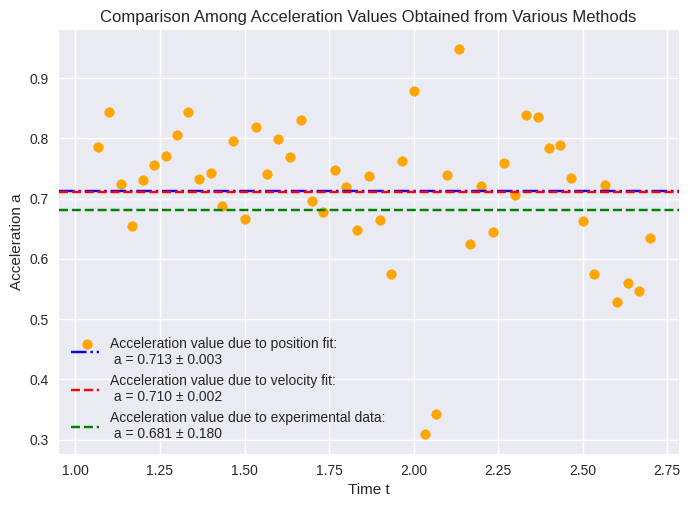

In [ ]:
#Definimos una función cuadrática a la cual ajustar los datos
def cuadratic_function(x, a, b, c):
  return (a*np.power(x, 2))/2 + b*x + c

#Almacenamos los parametros y la covarianza y realizamos el ajuste utilizando la función cuadratica
parameters1, covariance1 = curve_fit(cuadratic_function, time, position)
parameter1_a, parameter1_v0, parameter1_x0 = parameters1
cuadratic_fit = cuadratic_function(time, parameter1_a, parameter1_v0, parameter1_x0)

#Determinamos los errores de cada parametro
error1_a, error1_v0, error1_x0 = np.sqrt(np.diag(covariance1))

#Determinamos la media y desviación estandar de los datos experimentales de aceleración
mean_acceleration = np.mean(acceleration)
std_deviation_acceleration = np.std(acceleration)

#Graficamos lo obtenido
plt.scatter(time[:-2], acceleration[:-2],  color="orange", label='')
plt.axhline(y=parameter_a, color='blue', linestyle='-.', label=f'Acceleration value due to position fit: \n a = {parameter_a:.3f} ± {error_a:.3f}')
plt.axhline(y=parameter1_a, color='red', linestyle='--', label=f'Acceleration value due to velocity fit: \n a = {parameter1_a:.3f} ± {error1_a:.3f}')
plt.axhline(y=mean_acceleration, color='green', linestyle='--', label=f'Acceleration value due to experimental data: \n a = {mean_acceleration:.3f} ± {std_deviation_acceleration:.3f}')
plt.xlabel('Time t')
plt.ylabel('Acceleration a')
plt.title('Comparison Among Acceleration Values Obtained from Various Methods')
plt.legend()
